       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

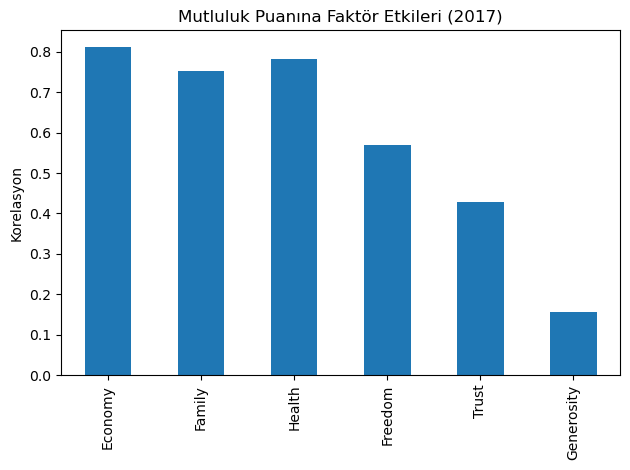


2015–2017 Puan Değişimi En Büyük Ülkeler:
Country
Venezuela   -1.560
Liberia     -1.038
Haiti       -0.915
Zimbabwe    -0.735
Zambia      -0.615
Mexico      -0.609
Ukraine     -0.585
Botswana    -0.566
Ghana       -0.513
Yemen       -0.484
Name: Change_2015_2017, dtype: float64

2015–2017 Puan Artışı En Büyük Ülkeler:
Country
Latvia         0.752
Romania        0.701
Togo           0.656
Senegal        0.631
Gabon          0.569
Egypt          0.541
Ivory Coast    0.525
Hungary        0.524
Bulgaria       0.496
Syria          0.456
Name: Change_2015_2017, dtype: float64


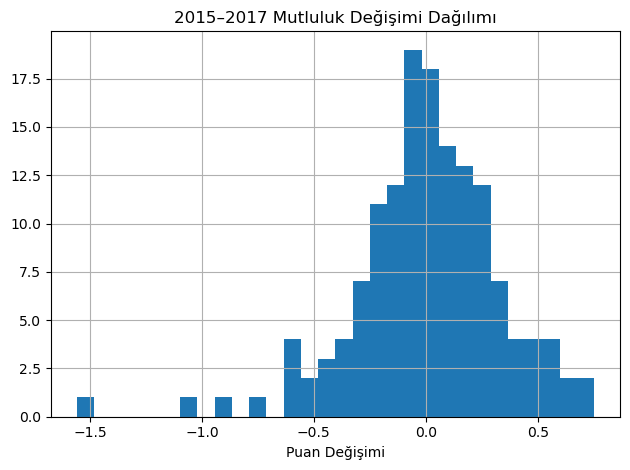


✅ Dünya Mutluluk Raporu Analizi Tamamlandı: World Happiness Report


In [9]:
# Dünya Mutluluk Raporu Projesi
# Dünya ülkelerinin 2015-2017 mutluluk seviyelerini analiz eder, faktörleri ve değişimleri inceler. __define-ocg__

import pandas as pd
import matplotlib.pyplot as plt

# 0️⃣ Kontrol değişkeni
varOcg = "World Happiness Report"

# 1️⃣ Verileri Yükle
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")

# 2️⃣ İlk Bakış
print(df_2015.head())
print(df_2016.head())
print(df_2017.head())

# 3️⃣ Yıllara etiket ekle
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017

# 4️⃣ Temel sütun adlarını uyumlu hale getir
df_2015.rename(columns={
    'Country': 'Country',
    'Happiness Rank': 'Happiness Rank',
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'Economy',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Trust',
    'Family': 'Family',
    'Freedom': 'Freedom',
    'Generosity': 'Generosity',
    'Region': 'Region'
}, inplace=True)

df_2016.rename(columns={
    'Country': 'Country',
    'Happiness Rank': 'Happiness Rank',
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'Economy',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Trust',
    'Family': 'Family',
    'Freedom': 'Freedom',
    'Generosity': 'Generosity',
    'Region': 'Region'
}, inplace=True)

df_2017.rename(columns={
    'Country': 'Country',
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'Economy',
    'Health..Life.Expectancy.': 'Health',
    'Trust..Government.Corruption.': 'Trust',
    'Family': 'Family',
    'Freedom': 'Freedom',
    'Generosity': 'Generosity',
    'Whisker.high': 'Whisker High',
    'Whisker.low': 'Whisker Low'
}, inplace=True)

# 5️⃣ 2017 veri setinde Region yoksa ekle
if 'Region' not in df_2017.columns:
    df_2017['Region'] = 'Unknown'

# 6️⃣ Üç yılı birleştir
df_all = pd.concat([df_2015, df_2016, df_2017], ignore_index=True)

# 7️⃣ Hangi ülkeler en mutlu?
mean_scores = df_all.groupby('Country')['Happiness Score'].mean().sort_values(ascending=False)
print("\nEn Mutlu Ülkeler (Ortalama):")
print(mean_scores.head(10))

# 8️⃣ Mutluluğa en çok katkıda bulunan faktörler (2017 örnek)
df_2017_corr = df_2017[['Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']].corr()
print("\n2017 Faktör Korelasyonları:")
print(df_2017_corr)

# 9️⃣ Faktör Etkileri - Görsel
df_2017_corr['Happiness Score'].drop('Happiness Score').plot(kind='bar')
plt.title('Mutluluk Puanına Faktör Etkileri (2017)')
plt.ylabel('Korelasyon')
plt.tight_layout()
plt.show()

# 🔟 2015–2017 puan farkları
pivot = df_all.pivot_table(index='Country', columns='Year', values='Happiness Score')
pivot['Change_2015_2017'] = pivot[2017] - pivot[2015]
pivot = pivot.dropna()
print("\n2015–2017 Puan Değişimi En Büyük Ülkeler:")
print(pivot['Change_2015_2017'].sort_values().head(10))
print("\n2015–2017 Puan Artışı En Büyük Ülkeler:")
print(pivot['Change_2015_2017'].sort_values(ascending=False).head(10))

pivot['Change_2015_2017'].hist(bins=30)
plt.title('2015–2017 Mutluluk Değişimi Dağılımı')
plt.xlabel('Puan Değişimi')
plt.tight_layout()
plt.show()

print(f"\n✅ Dünya Mutluluk Raporu Analizi Tamamlandı: {varOcg}")
